In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trainf = pd.read_csv("daily-minimum-temperatures-in-me.csv",error_bad_lines=False)

b'Skipping line 3653: expected 2 fields, saw 3\n'


In [3]:
trainf.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
trainf.columns = ['Date','Temp']
print(trainf.shape)

(3650, 2)


In [5]:
trainf.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
train = trainf.iloc[:2800,:]
test = trainf.iloc[2800:,:]

In [7]:
print(train.shape)
print(test.shape)

(2800, 2)
(850, 2)


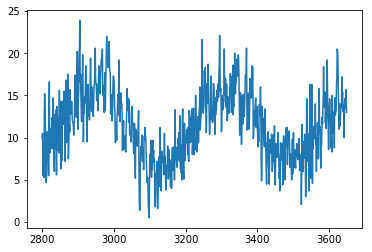

In [8]:
# Plot the time-series for the given dataset
plt.plot(test['Temp'])

In [9]:
# There are certain rows that have ? sign in them that needs to be removed and converted back to float
print(train.iloc[565,:][1])
type(train.iloc[565,:][1])

?0.2


str

In [10]:
train['Temp'] = train['Temp'].apply(lambda x : float(x[1:3]) if x[0]=='?' else x )

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


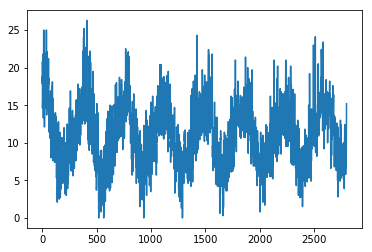

In [11]:
plt.plot(train['Temp'])

In [12]:
from datetime import datetime 
train['Date'] = pd.to_datetime(train['Date'])

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


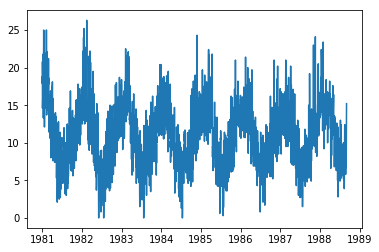

In [15]:
# train.index = train['Date']
# plt.plot(train['Temp'])

In [13]:
import datetime as dt

In [14]:
test['Date'] = pd.to_datetime(test['Date'])

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
def extract_timestep(train):
    train['year'] = train['Date'].dt.year
    train['month'] = train['Date'].dt.month 
    train['day'] = train['Date'].dt.day
extract_timestep(train)
extract_timestep(test)

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [16]:
train.head()

,Date,Temp,year,month,day
0,1981-01-01,20.7,1981,1,1
1,1981-01-02,17.9,1981,1,2
2,1981-01-03,18.8,1981,1,3
3,1981-01-04,14.6,1981,1,4
4,1981-01-05,15.8,1981,1,5


In [17]:
test.head()

,Date,Temp,year,month,day
2800,1988-09-02,10.0,1988,9,2
2801,1988-09-03,10.5,1988,9,3
2802,1988-09-04,5.5,1988,9,4
2803,1988-09-05,9.4,1988,9,5
2804,1988-09-06,8.8,1988,9,6


In [18]:
(train['Temp']).dtype

dtype('O')

In [19]:
train['Temp'] = (train['Temp']).apply(lambda x : float(x))

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


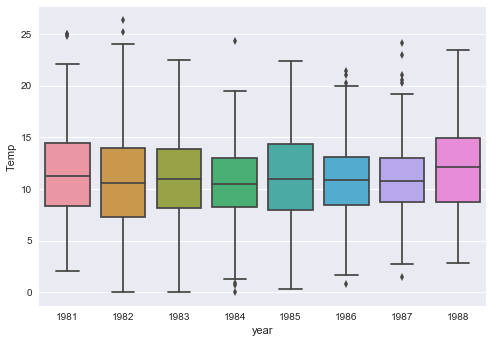

In [20]:
import seaborn as sns
sns.boxplot(train['year'],train['Temp'])

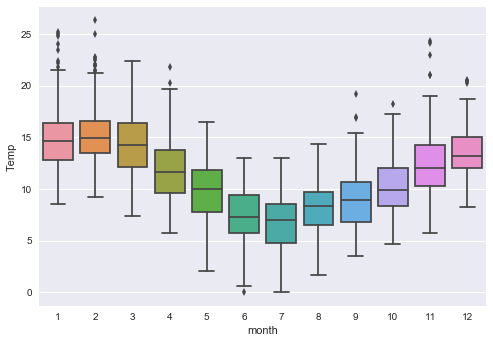

In [21]:
sns.boxplot(train['month'],train['Temp'])

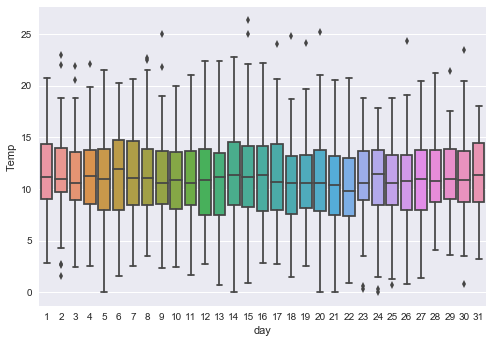

In [22]:
sns.boxplot(train['day'],train['Temp'])

In [23]:
# We choose RMSE as our metric for evaluation if we have been able to fit the data well or not 
# First of all we will be using GBM for time series prediction as a part of supervised learning method

In [24]:
train.tail()

,Date,Temp,year,month,day
2795,1988-08-28,8.8,1988,8,28
2796,1988-08-29,9.7,1988,8,29
2797,1988-08-30,9.0,1988,8,30
2798,1988-08-31,11.8,1988,8,31
2799,1988-09-01,15.2,1988,9,1


In [25]:
# Generating the future dataset in case the test dataset is not available
test_gen = pd.DataFrame(0,index = np.arange(850),columns=['Date'])
test_gen['Date'][0] = '1988-09-02'
test_gen['Date'] = pd.to_datetime(test_gen['Date'])
for i in range(1,851):
    test_gen['Date'][i] = test_gen['Date'][i-1]+dt.timedelta(1)

In [26]:
test_gen.head()

,Date
0,1988-09-02
1,1988-09-03
2,1988-09-04
3,1988-09-05
4,1988-09-06


# Baseline Model : Supervised Approach

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

In [145]:
train_x = train.iloc[:,2:5]
train_y = train.iloc[:,1]
gbr = GradientBoostingRegressor(n_estimators = 100,learning_rate=0.1,max_depth= 5)
gbr_fit = gbr.fit(train_x,train_y)

In [146]:
test_x = test.iloc[:,2:5]
test_y = test.iloc[:,1]
test_x_pred = gbr_fit.predict(test_x)

In [147]:
train_x_pred = gbr_fit.predict(train_x)

In [148]:
# Code for evaluation metrics 
def sse_calc(train_x_pred,train_y):
    sse = 0
    for i in range(0,len(train_y)):
        sse = sse+((train_x_pred[i]-train_y[i])**2)
    return sse

def sst_calc(train_y):
    sst = 0
    for i in range(0,len(train_y)):
        sst += (train_y[i]-np.mean(train_y))**2
    return sst 

def r_squared(sse,sst):
    return (1-(sse/sst))    

In [169]:
sse = sse_calc(train_x_pred,train_y)
sst = sst_calc(train_y)
r_squared(sse,sst)

0.70594061053043133

In [170]:
sse

13680.725397720664

In [150]:
rmse = (sse/len(train_y))**0.5

In [151]:
rmse

2.2104237956393811

In [156]:
test_eval.head()

,Orignal,pred
0,10.0,14.596444
1,10.5,14.079434
2,5.5,14.299417
3,9.4,12.523099
4,8.8,13.808372


In [ ]:
# test_eval dataframe was created in between and cell has been deleted by mistake

In [163]:
test_eval['Orignal']  = test_eval['Orignal'].apply(lambda x : float(x))

In [173]:
test_eval['sse_ind'] = (test_eval['pred']-test_eval['Orignal'])**2

In [174]:
sse_test = np.sum(test_eval['sse_ind'])
sse_test

14759.68099563697

In [176]:
test_eval['sst'] = (test_eval['Orignal']- np.mean(test_eval['Orignal']))**2
sst_test = np.sum(test_eval['sst'])

In [181]:
sst_test

13844.279811764694

In [179]:
r_sq = 1-(sse_test/sst_test)

In [182]:
# The negative value shows that the fit is not having straight line trend
r_sq

-0.06612125703313065

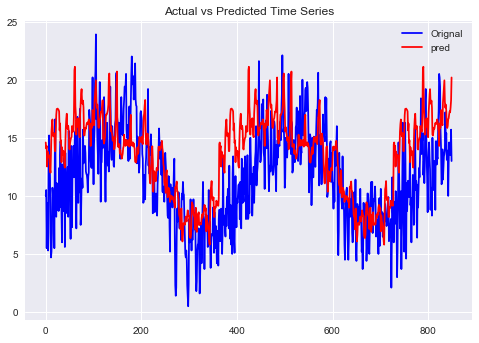

In [186]:
plt.plot(test_eval['Orignal'], color = 'blue')
plt.plot(test_eval['pred'],color= 'red')
plt.title("Actual vs Predicted Time Series")
plt.legend()
plt.show()

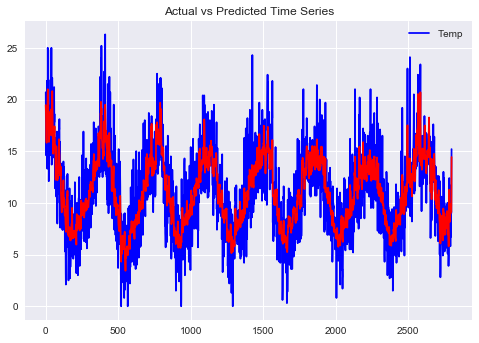

In [188]:
plt.plot(train_y, color = 'blue')
plt.plot(train_x_pred,color= 'red')
plt.title("Actual vs Predicted Time Series")
plt.legend()
plt.show()

In [184]:
# We can see that the fitting does not manages to capture seasonality and noise properly

# APPROACH 2 : ARIMA MODELING 

In [1]:
# ARIMA stands for Auto Regressive Integrated Moving Average and hence a combination of auto-regression and moving-averages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
trainf = pd.read_csv("daily-minimum-temperatures-in-me.csv",error_bad_lines=False)
trainf.columns = ['Date','Temp']
train = trainf.iloc[:2800,:]
test = trainf.iloc[2800:,:]

b'Skipping line 3653: expected 2 fields, saw 3\n'


In [2]:
import datetime as datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


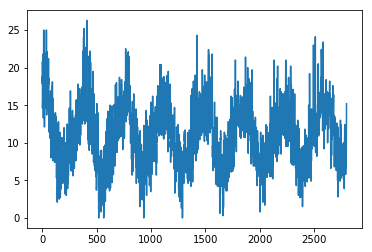

In [3]:
train['Temp'] = train['Temp'].apply(lambda x : float(x[1:3]) if x[0]=='?' else x )
plt.plot(train['Temp'])

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\NISHANT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# Method 1 : Plotting of rollling statistics characteristics
def test_stationarity1(timeseries):
    # Determining rolling statistics 
    rolmean = pd.rolling_mean(timeseries,window= 8)
    rolstd  = pd.rolling_std(timeseries,window = 8)
    # Plot rolling statistics 
    orig = plt.plot(train['Temp'],label='orignal',color = 'blue')
    mean = plt.plot(rolmean,label='Roling_Mean',color='red')
    std  = plt.plot(rolstd,label='Roling_Std',color = 'yellow')
    plt.legend(loc='upper right')
    plt.title('Roling Mean and Standard Deviation')
    plt.show()

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=8,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=8,center=False).std()
  """


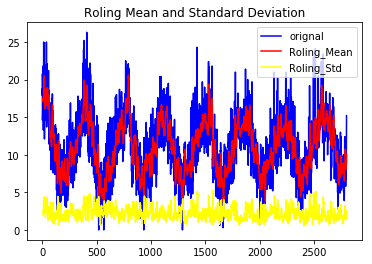

In [6]:
# Method 1 : Plotting of rollling statistics characteristics
test_stationarity1(train['Temp'])
# We can see from the given graph that the standard deviation is constant in nature almost
# Also we can infer that the mean of the series is constant with time(note : it just means that the 
#trend overall can't be increasing or decresing but it can be like the graph below (sine wave characteristics))

In [7]:
train['Temp'] = train['Temp'].apply(lambda x : float(x))

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
def test_stationarity2(timeseries):
    print("Checking the whole time series data for Dickey-Fuller test")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dftest[4])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [9]:
# Augmented Dickey Fuler test is also called Unit Root test
# ADF uses an Autoregressive model that optimizes information criterions across multiple lag values
test_stationarity2(train['Temp'])
# Here we don't need to stationarise the series since it is already stationary as suggested y p-value statistics

Checking the whole time series data for Dickey-Fuller test
{'1%': -3.4327044418732235, '5%': -2.8625802259721129, '10%': -2.5673237447595878}
Test Statistic                   -4.157881
p-value                           0.000776
#Lags Used                       19.000000
Number of Observations Used    2780.000000
Critical Value (1%)              -3.432704
Critical Value (5%)              -2.862580
Critical Value (10%)             -2.567324
dtype: float64


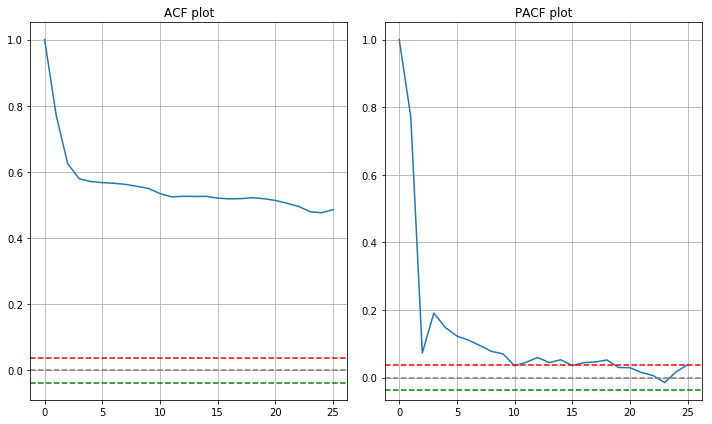

In [38]:
# ACF AND PACF 
lag_acf = acf(train['Temp'],nlags = 25)
lag_pacf = pacf(train['Temp'],nlags =25,method='ols')
plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train['Temp'])),linestyle='--',color='green')
plt.axhline(y=+1.96/np.sqrt(len(train['Temp'])),linestyle='--',color='red')
plt.plot(lag_acf)
plt.grid()
plt.title("ACF plot")
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train['Temp'])),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(train['Temp'])),linestyle='--',color='red')
plt.title("PACF plot")
plt.grid()
plt.tight_layout()

In [11]:
# set_index was used to set date as index 

In [12]:
train.set_index(train['Date'],inplace = True)

In [13]:
train.index 

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1988-08-23', '1988-08-24', '1988-08-25', '1988-08-26',
               '1988-08-27', '1988-08-28', '1988-08-29', '1988-08-30',
               '1988-08-31', '1988-09-01'],
              dtype='datetime64[ns]', name='Date', length=2800, freq=None)

In [14]:
ts = train['Temp']

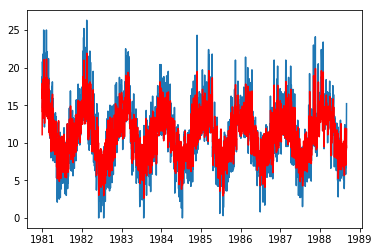

In [15]:
#AR model:
model = ARIMA(ts, order=(0,0,10 ))  
results_AR = model.fit(disp=-1)  
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')

In [16]:
# Code for evaluation metrics 
def sse_calc(train_x_pred,train_y):
    sse = 0
    for i in range(0,len(train_y)):
        sse = sse+((train_x_pred[i]-train_y[i])**2)
    return sse

def sst_calc(train_y):
    sst = 0
    for i in range(0,len(train_y)):
        sst += (train_y[i]-np.mean(train_y))**2
    return sst 

def r_squared(sse,sst):
    return (1-(sse/sst))    

In [17]:
train_y = train['Temp']

In [18]:
sse = sse_calc(results_AR.fittedvalues,train_y)

In [19]:
sst = sst_calc(train_y)

In [20]:
rsq = 1-(sse/sst)

In [21]:
print(sse,sst)

18302.2225872 46523.6815679


In [22]:
print(rsq)

0.606604164365


In [23]:
from datetime import datetime 
import datetime as dt

In [24]:
# Generating the future dataset in case the test dataset is not available
test_gen = pd.DataFrame(0,index = np.arange(850),columns=['Date'])
test_gen['Date'][0] = '1988-09-02'
test_gen['Date'] = pd.to_datetime(test_gen['Date'])
for i in range(1,851):
    test_gen['Date'][i] = test_gen['Date'][i-1]+dt.timedelta(1)

In [25]:
test_gen['Date'] = pd.to_datetime(test_gen['Date'])

In [26]:
test_gen.set_index(test_gen['Date'],inplace = True)

In [27]:
del test_gen['Date']

In [28]:
print(results_AR.summary())

                              ARMA Model Results                              
Dep. Variable:                   Temp   No. Observations:                 2800
Model:                    ARMA(0, 10)   Log Likelihood               -6598.054
Method:                       css-mle   S.D. of innovations              2.553
Date:                Sun, 17 Jun 2018   AIC                          13220.107
Time:                        14:19:56   BIC                          13291.356
Sample:                    01-01-1981   HQIC                         13245.825
                         - 09-01-1988                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.0793      0.191     57.982      0.000      10.705      11.454
ma.L1.Temp      0.6884      0.019     36.282      0.000       0.651       0.726
ma.L2.Temp      0.3960      0.023     17.241    

In [29]:
test_gen.tail()

""
Date
1990-12-26
1990-12-27
1990-12-28
1990-12-29
1990-12-30


In [30]:
start_index = datetime(1988,8,22)
end_index = datetime(1990,12,30)
forecast = results_AR.forecast(steps=850)[0]

In [31]:
(forecast)[:20]

array([ 13.76106694,  12.93000074,  12.77403683,  12.41007467,
        12.40331702,  12.64065785,  12.38057018,  12.25030243,
        12.04264617,  11.47437674,  11.07930632,  11.07930632,
        11.07930632,  11.07930632,  11.07930632,  11.07930632,
        11.07930632,  11.07930632,  11.07930632,  11.07930632])

In [36]:
train1 = train['Temp']
history = [x for x in train1]
predictions_f = list()
for i in range(0,850):
    model = ARIMA(history,order=(0,0,10))
    model_fit = model.fit(disp=-1)
    yhat_f = model_fit.forecast()[0][0]
    predictions_f.append(yhat_f)
    history.append(yhat_f)

In [37]:
predictions_f[:7]

[13.761066936918542,
 12.930001042606108,
 12.774036843385495,
 12.410074688080519,
 12.403317961414814,
 12.640660453594144,
 12.38057126416845]